In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from server.database import SessionLocal, engine
from server.models import models
from server.services.get_db import get_db
from server.models.models import Stock
from server.models.Portfolio import Portfolio
from sqlalchemy.types import Float, Integer, String, DateTime
from server.crud.stock_history_crud import get_stock_history, create_stock_history, get_latest_stock_history_instance
from server.schemas.StockHistory import StockHistoryBase
from datetime import datetime, timedelta
from server.services.stock_history.update_stock_history import update_db_data


In [3]:
models.Base.metadata.create_all(bind=engine)
db = next(get_db())


In [4]:


update_db_data(db)


[*********************100%***********************]  1 of 1 completed
A was updated
[*********************100%***********************]  1 of 1 completed
AA was updated
[*********************100%***********************]  1 of 1 completed
AAA was updated
[*********************100%***********************]  1 of 1 completed
AAAU was updated
[*********************100%***********************]  1 of 1 completed
AAC was updated
[*********************100%***********************]  1 of 1 completed
AACG was updated
[*********************100%***********************]  1 of 1 completed
AACI was updated
[*********************100%***********************]  1 of 1 completed
AACIU was updated
[*********************100%***********************]  1 of 1 completed
AACIW was updated
[*********************100%***********************]  1 of 1 completed
AADI was updated
[*********************100%***********************]  1 of 1 completed
AADR was updated
[*********************100%***********************]  1 of 1 

In [11]:
def update_stock_history_data(db, symbol: str) -> bool:
    latest_records = get_latest_stock_history_instance(db, symbol)
    start_time = latest_records.date + \
        timedelta(days=1) if latest_records else None
    data = yf.download(symbol, start=start_time, period='max').reset_index()
    data = data[data.Date > start_time] if start_time else data

    if len(data) > 0:
        for col in data.columns:
            data = data.rename(columns={col: col.lower().replace(' ', '_')})

        data['symbol'] = symbol
        data = [StockHistoryBase(**d) for d in data.to_dict('records')]
        db_stock_history = create_stock_history(db, symbol, data)

    return len(data) > 0


In [5]:
import yfinance as yf

symbol = 'AIKI'

latest_records = get_latest_stock_history_instance(db, symbol)
start_time = latest_records.date + timedelta(days=1) if latest_records else None
data = yf.download(symbol, start=start_time, period='max').reset_index()
data = data[data.Date > start_time] if start_time else data


if len(data) > 0:
    for col in data.columns:
        data = data.rename(columns={col: col.lower().replace(' ', '_')})
    
    for col in data.select_dtypes(include=[np.float64]).columns:
        data[col] = data[col].round(3)
        

data
    

PendingRollbackError: This Session's transaction has been rolled back due to a previous exception during flush. To begin a new transaction with this Session, first issue Session.rollback(). Original exception was: (MySQLdb.ProgrammingError) nan can not be used with MySQL
[SQL: INSERT INTO stock_history (symbol, date, open, high, low, close, adj_close, volume) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)]
[parameters: (('AIKI', Timestamp('1973-01-03 00:00:00'), 4097.137, 4097.137, 4097.137, 4097.137, 230.436, '0.0'), ('AIKI', Timestamp('1973-01-04 00:00:00'), 4097.137, 4097.137, 4097.137, 4097.137, 230.436, '0.0'), ('AIKI', Timestamp('1973-01-08 00:00:00'), 3918.906, 3918.906, 3918.906, 3918.906, 220.412, '0.0'), ('AIKI', Timestamp('1973-01-09 00:00:00'), 3918.906, 3918.906, 3918.906, 3918.906, 220.412, '0.0'), ('AIKI', Timestamp('1973-01-10 00:00:00'), 3918.906, 3918.906, 3918.906, 3918.906, 220.412, '0.0'), ('AIKI', Timestamp('1973-01-12 00:00:00'), 3562.48, 3562.48, 3562.48, 3562.48, 200.365, '0.0'), ('AIKI', Timestamp('1973-01-15 00:00:00'), 3562.48, 3562.48, 3562.48, 3562.48, 200.365, '0.0'), ('AIKI', Timestamp('1973-01-16 00:00:00'), 3562.48, 3562.48, 3562.48, 3562.48, 200.365, '0.0')  ... displaying 10 of 11193 total bound parameter sets ...  ('AIKI', Timestamp('2022-12-22 00:00:00'), 3.43, 3.46, 3.281, 3.285, 3.285, '12468.0'), ('AIKI', Timestamp('2022-12-23 00:00:00'), 3.31, 3.463, 3.31, 3.33, 3.33, '16782.0'))]
(Background on this error at: https://sqlalche.me/e/14/f405) (Background on this error at: https://sqlalche.me/e/14/7s2a)

In [8]:
import yfinance as yf

symbol = 'AAPL'

latest_records = get_latest_stock_history_instance(db, symbol)
start_time = latest_records.date + timedelta(days=1) if latest_records else None
data = yf.download(symbol, start=start_time, period='max').reset_index()
data = data[data.Date > start_time] if start_time else data


NameError: name 'db' is not defined

<AxesSubplot: >

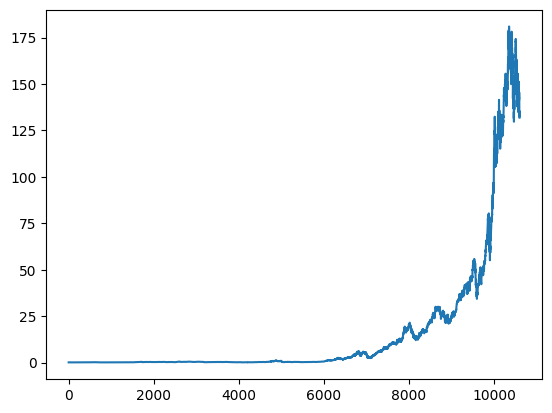

In [48]:
import numpy as np
import matplotlib
start_time
data.adj_close.plot()

In [38]:
import pandas as pd

data.dtypes['adj_close'] == pd.Float64Dtype

pd.Float64Dtype()

Float64Dtype()

In [8]:
symbols = list(map(lambda x: x[0], db.query(Stock.symbol).all()))
print(symbols)

[]


In [6]:
import yfinance as yf
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
dfs = []

for symbol in tqdm(symbols[:10]):
    print(symbol)
    data = yf.download(symbol, period='max').reset_index()

    for col in data.columns:
        data = data.rename(columns={col: col.lower().replace(' ', '_')})

    data['symbol'] = symbol
    data = [StockHistoryBase(**d) for d in data.to_dict('records')]
    create_stock_history(db, symbol, data)


In [ ]:
def update_stock_history_data(db, symbol):
    latest_records = get_latest_stock_history_instance(db, symbol)
    start_time = latest_records.date + timedelta(days=1) if latest_records else None
    data = yf.download(symbol, start=start_time, period='max').reset_index()
    data = data[data.Date > start_time] if start_time else data
        
    if len(data) > 0:
        for col in data.columns:
            data = data.rename(columns={col: col.lower().replace(' ', '_')})

        data['symbol'] = symbol
        data = [StockHistoryBase(**d) for d in data.to_dict('records')]
        db_stock_history = create_stock_history(db, symbol, data)
        
    return len(data) > 0


In [ ]:
for symbol in symbols:
    update_stock_history_data(db, symbol)
    break

In [ ]:
update_stock_history_data(db, 'TSLA')

In [ ]:
yf.download(symbol, start=None, period='max').reset_index()

In [ ]:
help(yf.download)

In [ ]:
yf.download(symbol, start=datetime(2022, 12, 10, 0, 0), period='max').reset_index()

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
from server.services.get_db import get_db
from server.database import SessionLocal, engine
from server.models import models
from sqlalchemy import and_, desc
from server.models.StockHistory import StockHistory
from server.schemas.StockHistory import StockHistory as StockHistorySchema, StockHistoryBase
symbol = 'AIKI'

models.Base.metadata.create_all(bind=engine)
db = next(get_db())


def get_latest_stock_history_instance(db, symbol: str) -> StockHistorySchema:
    return db.query(StockHistory).filter(StockHistory.symbol == symbol).order_by(desc(StockHistory.date)).first()


latest_records = get_latest_stock_history_instance(db, symbol)
start_time = latest_records.date + timedelta(days=1) if latest_records else None
data = yf.download(symbol, start=start_time, period='max').reset_index()
data = data[data.Date > start_time] if start_time else data


if len(data) > 0:
    for col in data.columns:
        data = data.rename(columns={col: col.lower().replace(' ', '_')})
    
    for col in data.select_dtypes(include=[np.float64]).columns:
        data[col] = data[col].round(3)
        
    data['symbol'] = symbol
    # data = data.dropna()
    
    
data

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,adj_close,volume,symbol
0,1973-01-03,4097.137,4097.137,4097.137,4097.137,230.436,0.0,AIKI
1,1973-01-04,4097.137,4097.137,4097.137,4097.137,230.436,0.0,AIKI
2,1973-01-08,3918.906,3918.906,3918.906,3918.906,220.412,0.0,AIKI
3,1973-01-09,3918.906,3918.906,3918.906,3918.906,220.412,0.0,AIKI
4,1973-01-10,3918.906,3918.906,3918.906,3918.906,220.412,0.0,AIKI
...,...,...,...,...,...,...,...,...
11191,2022-12-22,3.430,3.460,3.281,3.285,3.285,12468.0,AIKI
11192,2022-12-23,3.310,3.463,3.310,3.330,3.330,16783.0,AIKI
11193,2022-12-27,3.320,3.412,3.070,3.070,3.070,22311.0,AIKI
11194,2022-12-28,3.060,3.190,3.020,3.100,3.100,40569.0,AIKI
